In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load the dataset
data = pd.read_csv('/content/bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "deposit", "month", "poutcome", "contact"]

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


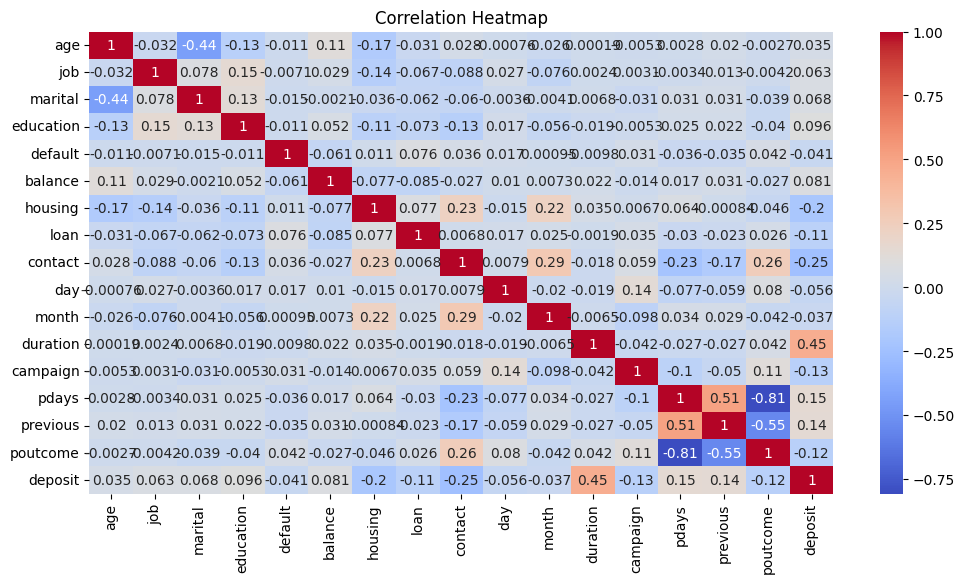

In [ ]:
# Now that all columns are numeric, we can generate the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Split data into features (X) and target (y)
X = data.drop(columns=["deposit"])
y = data["deposit"]


In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Save the scaler for future use
scaler_filename = "scaler.pkl"
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler saved as '{scaler_filename}'")


Scaler saved as 'scaler.pkl'


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
%%capture
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

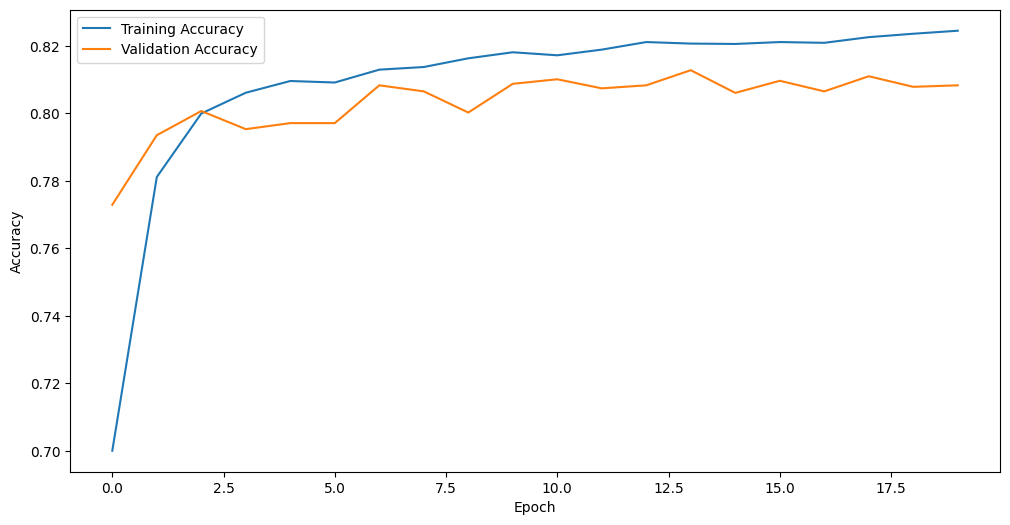

Model saved as 'bank_model.h5'


In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save('bank_model.h5')
print("Model saved as 'bank_model.h5'")


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


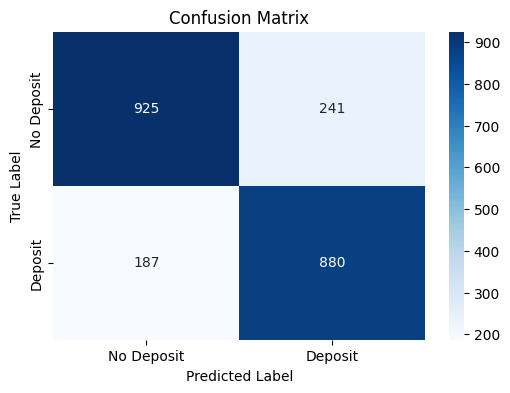

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1166
           1       0.79      0.82      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Deposit', 'Deposit'], yticklabels=['No Deposit', 'Deposit'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print(classification_report(y_test, y_pred))

In [ ]:
# Save the label encoders
label_encoders_filename = "label_encoders.pkl"
with open(label_encoders_filename, 'wb') as file:
    pickle.dump(label_encoders, file)

print(f"Label Encoders saved as '{label_encoders_filename}'")


Label Encoders saved as 'label_encoders.pkl'
